# Crime Data Analysis
## Pandemic's effect on Quarantine 

#### (Proposal and Data in Hand Explanation)

For my project I plan to use Crime data from 2020 to Present in California, in order to evaluate how the pandemic and quarantine affected crime. To do so, I want to select certain time periods that had different circumstances, like March 2020 - January 2021 vs. March 2022 - January 2023 and compare the number of crimes committed, the types of crimes committed (with emphasis on petty crime), along with where and when in order to determine if the government regulated quarantine impacted crime.

https://www.kaggle.com/datasets/qnqfbqfqo/crime-data-from-2020-to-present

The dataset I collected in order to do my analysis is from Kaggle.  I understand is not always the most trustworthy or reliable, however when looking at my specific data that doesnt appear to the case. There are minimal n/a values and where there are some, they are typically in columns that I would not be looking at.

The data itself is 815,882 entries, but filtering out the dates that will not be used will certainly reduce that number. If I were to guess I am probably around ~400,000 entries. There are 18 total columns/variables, however I will realistically look at ~10, with a mixture of categorical (like victim sex and descent) and numerical (like time & crime code).

#### (Analysis Plan)

The plan for my report involves looking 'Crm Cd Desc' (actual crime committed), versus a number of different variables to see the correlation. While using different variable I will also be looking at different time periods. My idea is to create a variety of histograms/barplots for the three time periods. For example, I hope to plot the amount/count of crimes committed over the areas to see which areas have higher crime, then I can compare them against the following and matching two year 

##### Loading in the packages required for the analysis

In [1]:
import requests
import pandas as pd
import base64
import json
import urllib
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
from datetime import datetime as dt
import seaborn as sns

##### Reading in the csv file that contains the crime data (no path required because the data and this notebook belong to the same folder)

In [2]:
Crime_Data = pd.read_csv('Crime_Data.csv')

In [3]:
Crime_Data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [4]:
pd.Timestamp(Crime_Data['Date Rptd'].iloc[0])

Timestamp('2020-01-08 00:00:00')

##### Creating new date columns that remove the times and make the date easier to manipulate

In [5]:
Crime_Data['Date Reported'] = [pd.Timestamp(x) for x in Crime_Data['Date Rptd']]

In [6]:
Crime_Data['Date Occured'] = [pd.Timestamp(x) for x in Crime_Data['DATE OCC']]

In [7]:
Crime_Data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Date Reported,Date Occured
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,2020-01-08,2020-01-08
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,2020-01-02,2020-01-01
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474,2020-04-14,2020-02-13
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,2020-01-01,2020-01-01
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468,2020-01-01,2020-01-01


In [8]:
Crime_Data.keys()

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON', 'Date Reported', 'Date Occured'],
      dtype='object')

##### Data pre-processing and cleaning, removing comlumns that will not be used, like LAT & LON (since the data comes from California I feel it is a less significant variable in comparison with the others)

In [9]:
#example: finaldfold = joined_dfold.drop(columns=['available_markets', 'disc_number','type_y', 'uri_y', 'track_href','preview_url','is_local' ,'uri_x', 'analysis_url', 'duration_ms_y', 'duration_ms_x','external_ids', 'external_urls', 'href'])

In [10]:
Cleaned_Crime_Data = Crime_Data.drop(columns = ['Part 1-2','Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street', 'LAT', 'LON'])

In [11]:
Cleaned_Crime_Data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,...,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,Date Reported,Date Occured
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,0444 0913,...,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL,2020-01-08,2020-01-08
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,...,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,2020-01-02,2020-01-01
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,...,X,726.0,POLICE FACILITY,NaN,NaN,AA,Adult Arrest,200 E 6TH ST,2020-04-14,2020-02-13
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,...,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,5400 CORTEEN PL,2020-01-01,2020-01-01
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,...,X,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,14400 TITUS ST,2020-01-01,2020-01-01


##### Below are histograms and a scattterplot that compare the victim age to the crime code of the actual crime committed. 

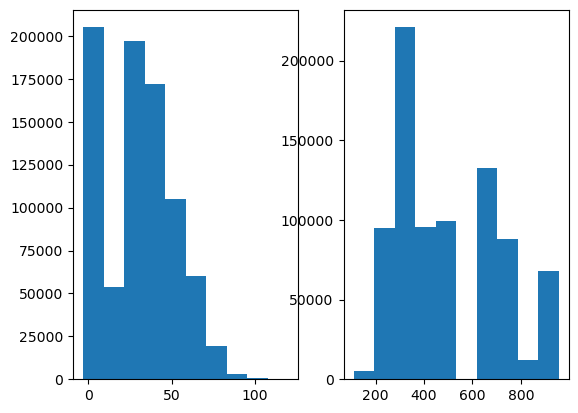

In [12]:
fig1, ax1 = plt.subplots(1, 2)
ax1[0].hist(Cleaned_Crime_Data['Vict Age'])
ax1[1].hist(Cleaned_Crime_Data['Crm Cd'])

plt.show()

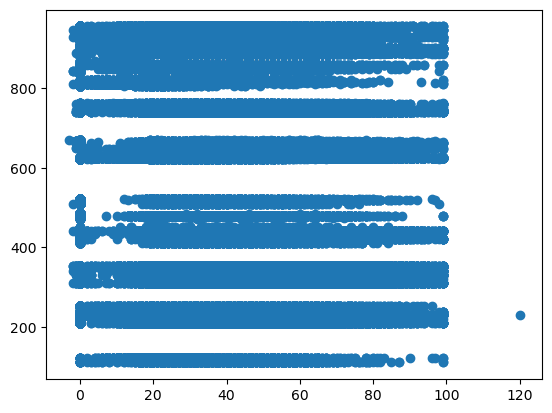

In [13]:
fig2, ax2 = plt.subplots()
ax2.scatter(x = Cleaned_Crime_Data['Vict Age'],
            y = Cleaned_Crime_Data['Crm Cd'])

plt.show()

The histograms are not the most informative, but they do reveal the overall number and age of people affected by crime as well as the number of crimes for each crime code. The first scatterplot reveals that under 50 are the most heavily aaffected by crime, while the crime cd histogram reveals >400,000 crimes have codes between 200 and 400. The scatterplot shows the actual comparison between the two variables. Not too much is uncovered through the scatterplot but their happens to be a clear outlier of somebody who is 120 and committed a ~200 crime code.

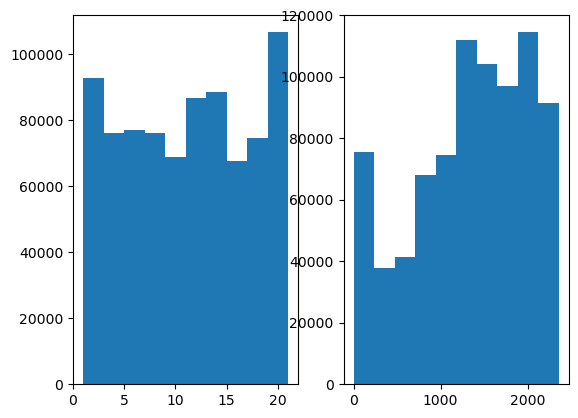

In [14]:
fig1, ax1 = plt.subplots(1, 2)
ax1[0].hist(Cleaned_Crime_Data['AREA'])
ax1[1].hist(Cleaned_Crime_Data['TIME OCC'])

plt.show()

The next steps for my project include sorting the data to create the date partitions, I can then create the visuals to use to compare the results of the differeing dates to see if I can uncover any trends or patterns that may have come as a result of the coronavirus.

In [15]:
#Cleaned_Crime_Data[Cleaned_Crime_Data['Date Occured'].dt.year == 2020].tail()

In order to compare the effects of covid and the quarantine, my plan was to analyze time periods like March 2020 - January 2021 vs. March 2022 - January 2023, but when trying to sort those specific dates I had a bit of trouble. I ended up simplifying the process altogether and divided the data set up by the years, with 2020 serving as the actual Coronavirus data. The following years, 2021 and 2022 are used kind of like control groups, in order to reference and make comparisons. 

In [16]:
Crime_Data2020 = Cleaned_Crime_Data[Cleaned_Crime_Data['Date Occured'].dt.year == 2020]

In [17]:
Crime_Data2021 = Cleaned_Crime_Data[Cleaned_Crime_Data['Date Occured'].dt.year == 2021]

In [18]:
Crime_Data2022 = Cleaned_Crime_Data[Cleaned_Crime_Data['Date Occured'].dt.year == 2022]

##### The first thing to look at when spitting the data into the different years is the total number of crimes in each year

In [19]:
Crime_Data2020['DR_NO'].count()

199398

In [20]:
Crime_Data2021['DR_NO'].count()

209334

In [21]:
Crime_Data2022['DR_NO'].count()

234199

Already, it is apparent that the total number of crimes has risen since 2020 or the quarantine. The jump from 2020 to 2021 is not that substancial, which I believe is a result of lingering effects of Covid. However the jump from 2020 to 2022 or even 2021 to 2022 there is obvious rise of 25-35,000 crimes.

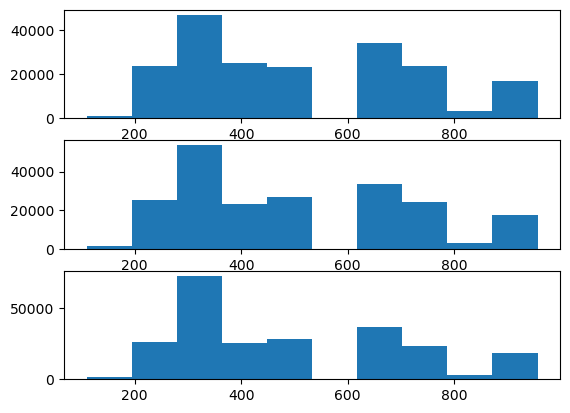

In [22]:
fig1, ax1 = plt.subplots(3,1)
ax1[0].hist(Crime_Data2020['Crm Cd'])
ax1[1].hist(Crime_Data2021['Crm Cd'])
ax1[2].hist(Crime_Data2022['Crm Cd'])
plt.show()

The histograms created are similar to one created above in that they look at the total number of each crime code that was committed, the only difference is that these specific histograms look at each year, 2020,2021 and 2022 respectively. Because it is the actual code number rather than the name of the crime, not much can be inferred relating to petty crime, but the overall amounts can still be compared. Since 2022 was shown to have a total number of crime earlier, we can see where the extra crimes fit. 2022 compared to 2020 & 2021 shows that there is a significant amount more of ~300 crime code crimes far surpassing 500,000. The comparison of 2020 vs. 2021 shows significanty less information with the only apparent change coming in a slight rise of ~450 crime code crimes in 2021.

In [23]:
#Crime_Data2020['Date Occured'].dt.month.iloc[120000]

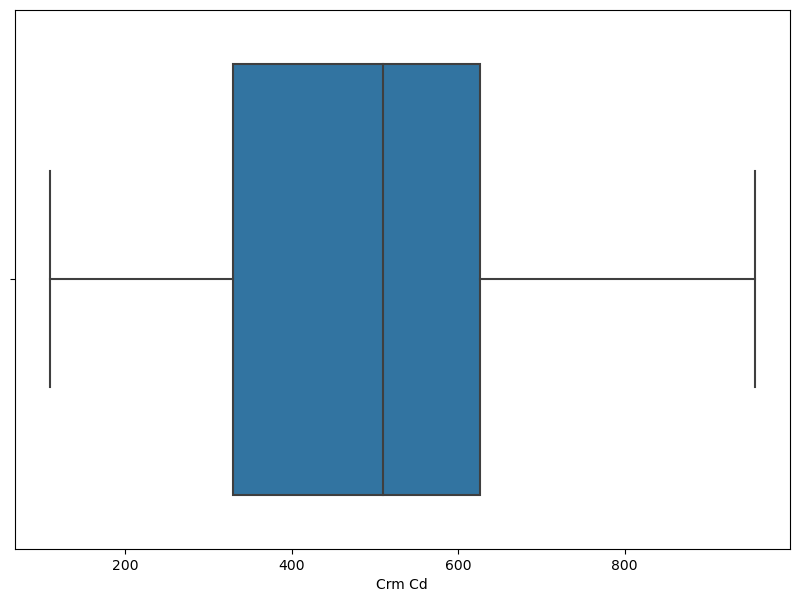

In [24]:
 fig = plt.figure(figsize =(10, 7))
sns.boxplot(x=Crime_Data2020['Crm Cd'])
plt.show()

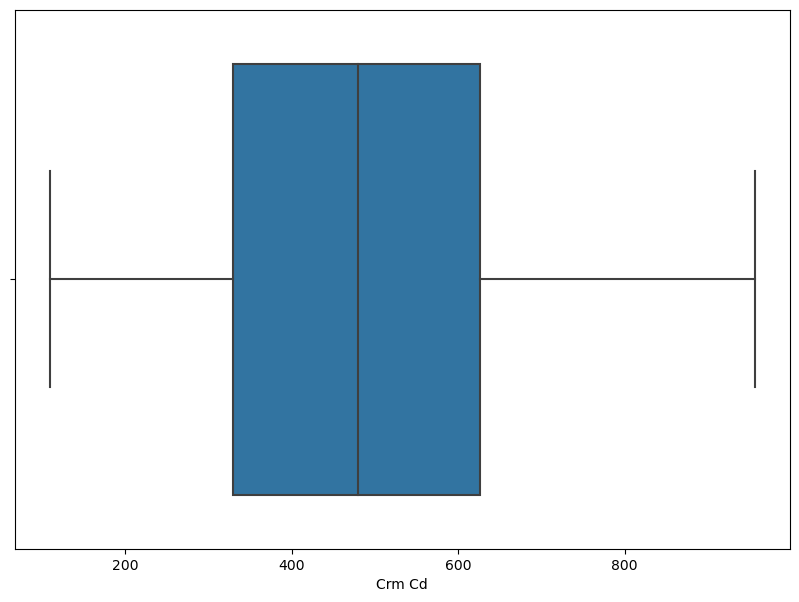

In [25]:
fig = plt.figure(figsize =(10, 7))
sns.boxplot(x=Crime_Data2021['Crm Cd'])
plt.show()

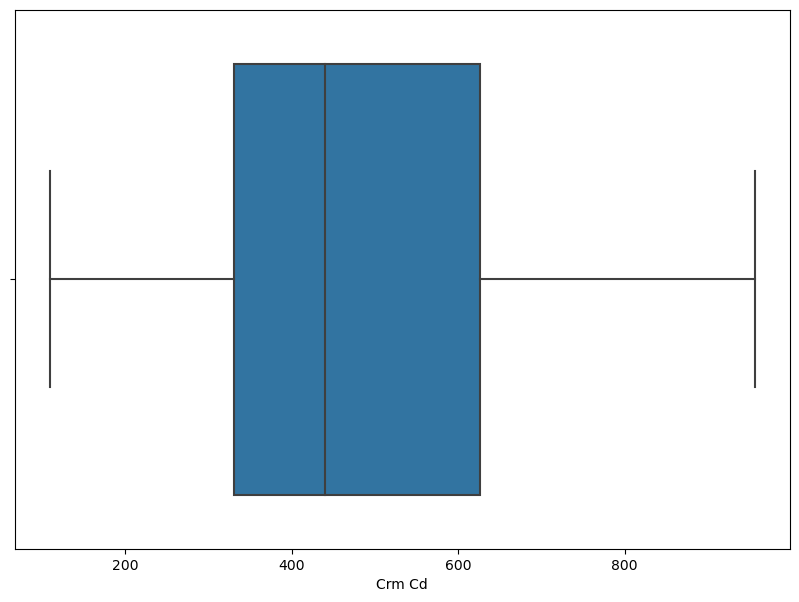

In [26]:
fig = plt.figure(figsize =(10, 7))
sns.boxplot(x=Crime_Data2022['Crm Cd'])
plt.show()

The boxplots above show and compare the distribution/important points of each year. While the actual box and whiskers are not that different, the median line in the middle of each box shows that there is clearly a higher density of lower crime code crimes in 2022 and 2021 as the line moves further to the left in the next year. Using what was revealed in the histograms, we can associate it with the rise of the 400 crime code crimes we were able to see.

##### Below are visuals for the actual count of each different crime frome each year, with the actual crime name as the x axis.

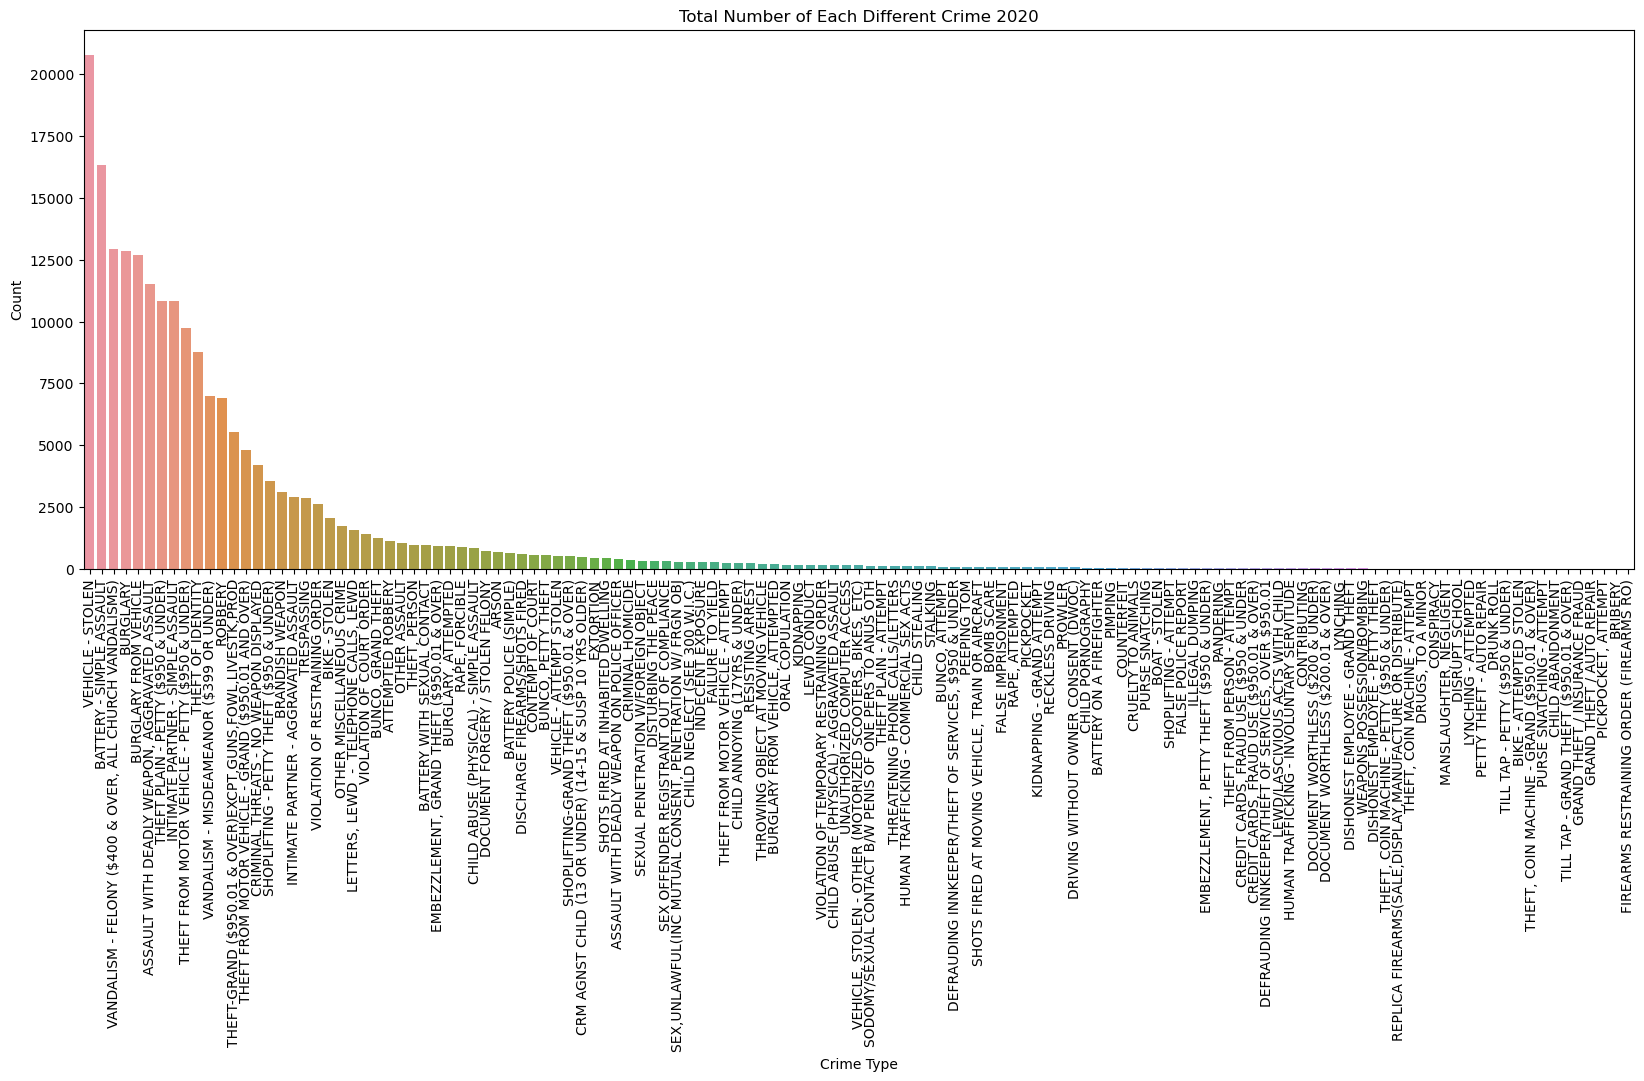

In [27]:
plt.figure(figsize=(20, 7))
sns.countplot(data = Crime_Data2020 , x='Crm Cd Desc', order = Crime_Data2020['Crm Cd Desc'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Total Number of Each Different Crime 2020')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.show()

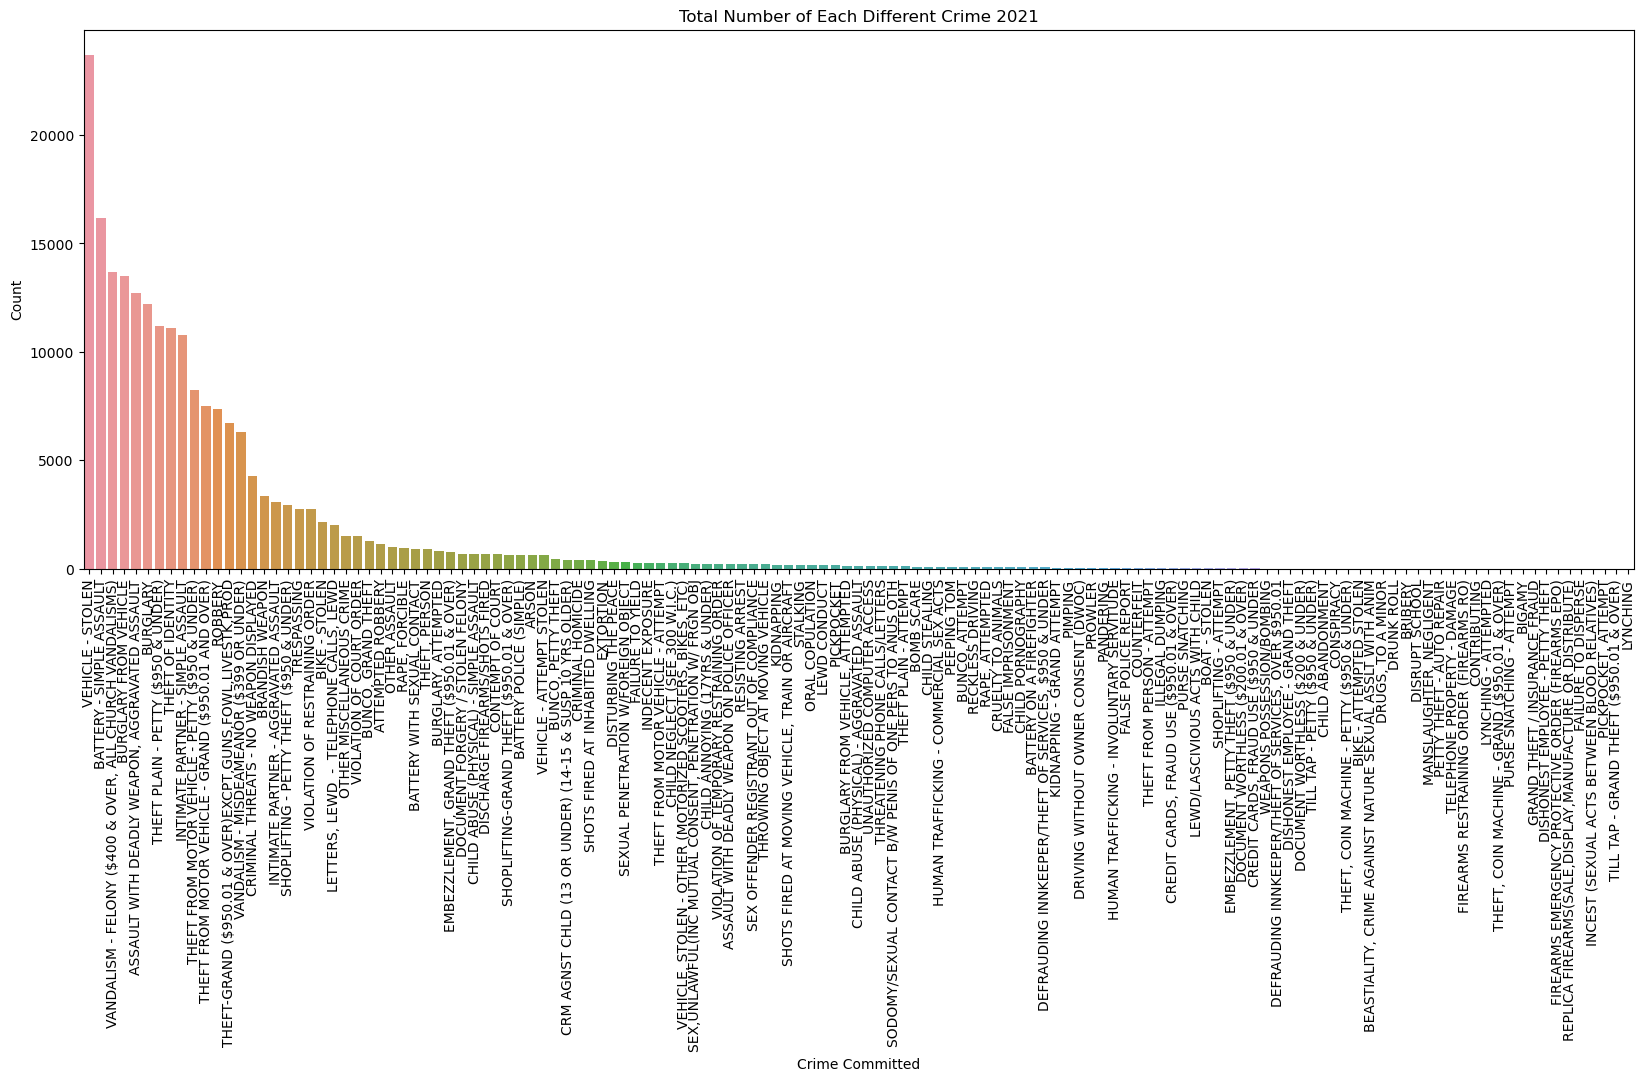

In [28]:
plt.figure(figsize=(20, 7))
sns.countplot(data = Crime_Data2021 , x='Crm Cd Desc', order = Crime_Data2021['Crm Cd Desc'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Total Number of Each Different Crime 2021')
plt.xlabel('Crime Committed')
plt.ylabel('Count')
plt.show()

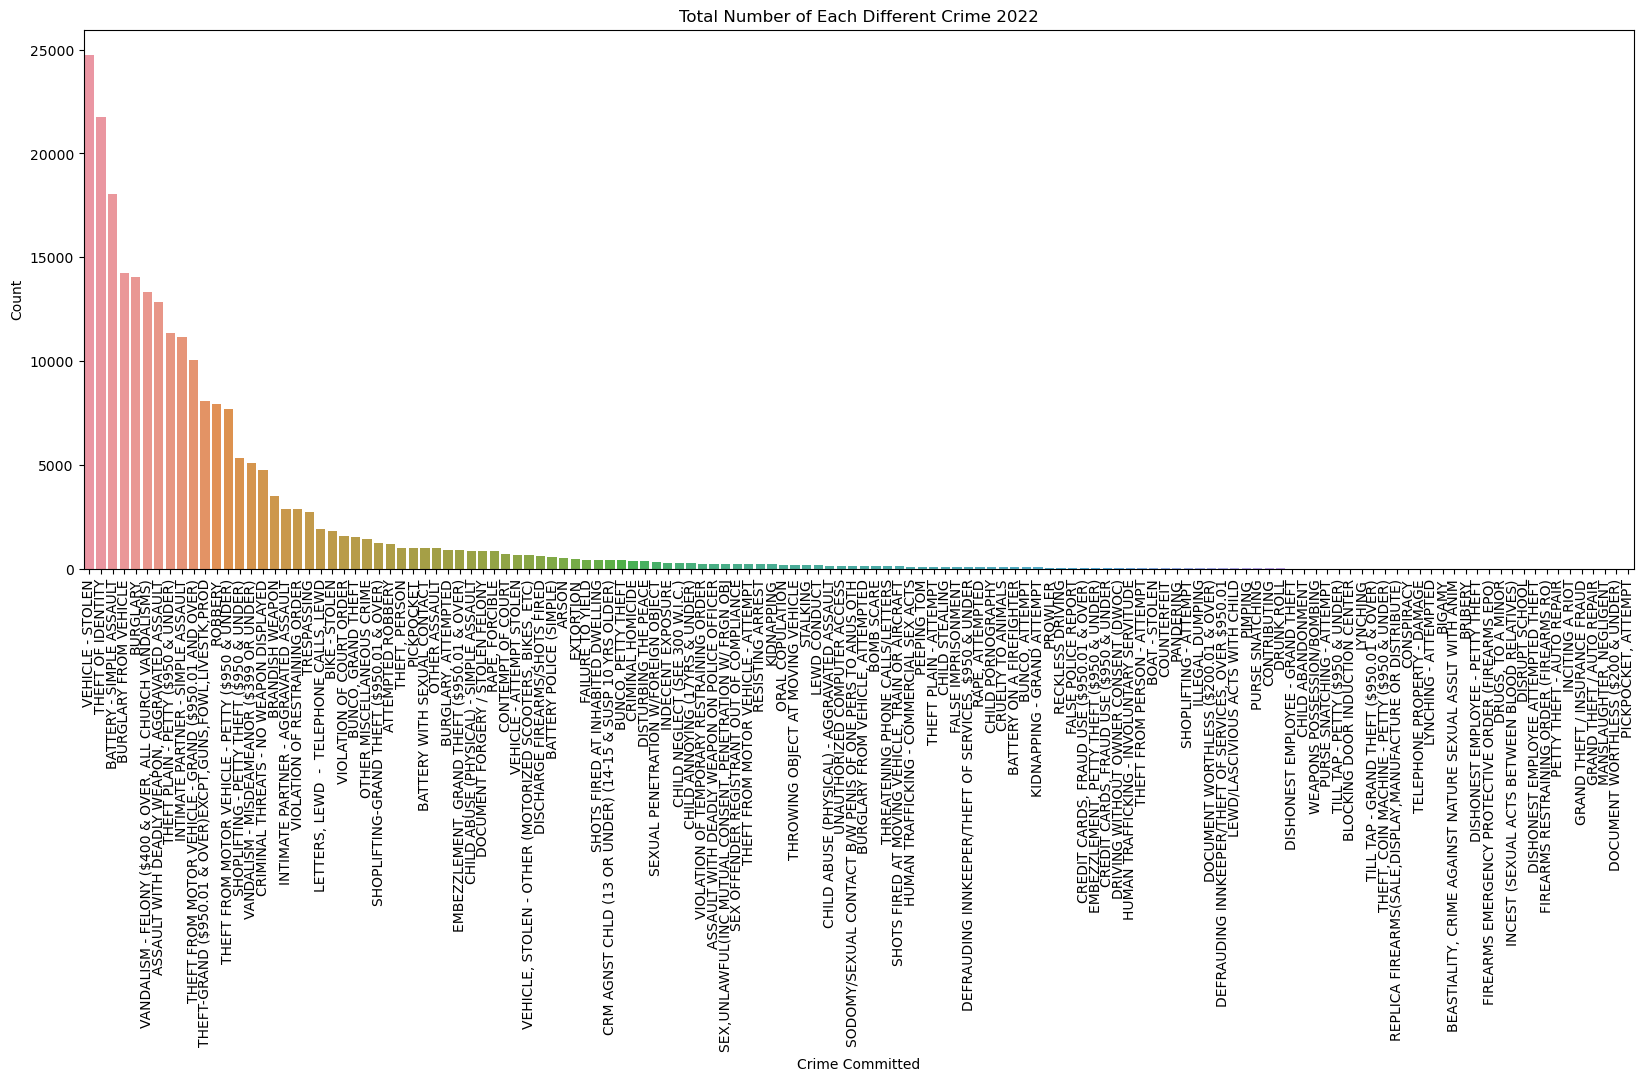

In [29]:
plt.figure(figsize=(20, 7))
sns.countplot(data = Crime_Data2022 , x='Crm Cd Desc', order = Crime_Data2022['Crm Cd Desc'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Total Number of Each Different Crime 2022')
plt.xlabel('Crime Committed')
plt.ylabel('Count')
plt.show()

When looking at the figures above, they might be a bit overwhelming but the information it provides is crucial. On the surface it may not look like petty crime was that affected, but in 2020 crime of petty vandalism and petty theft were ~11000 and ~7500, while in 2021 we see a slight bump up in those numbers, with even shoplifting becoming a more common crime. In 2022 however, the pattern does not continue as the petty crimes fall to ~6000 for shoplifting, theft and vandalism. In 2022 there a clear jump in the number in major offenses like identity theft and burglary from a vehicle. 

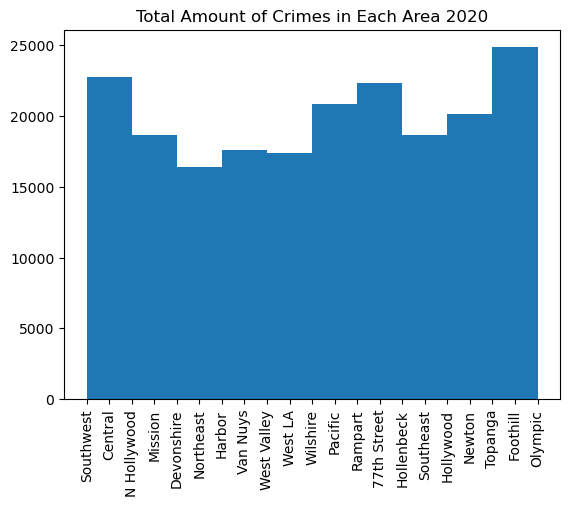

In [30]:
fig1, ax1 = plt.subplots()
ax1.hist(Crime_Data2020['AREA NAME'])
plt.xticks(rotation=90)
plt.title('Total Amount of Crimes in Each Area 2020')
plt.show()

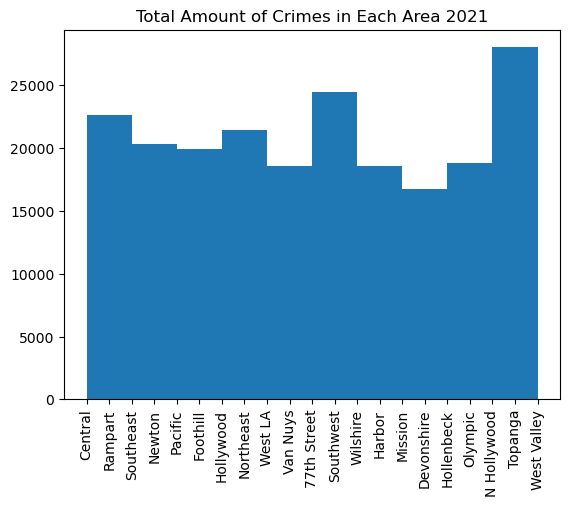

In [31]:
fig1, ax1 = plt.subplots()
ax1.hist(Crime_Data2021['AREA NAME'])
plt.xticks(rotation=90)
plt.title('Total Amount of Crimes in Each Area 2021')
plt.show()

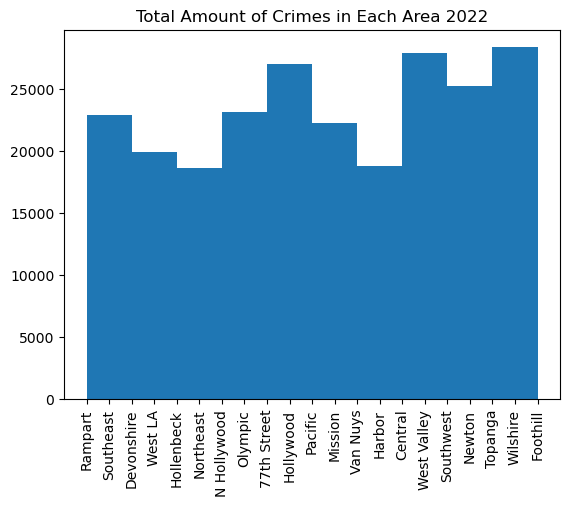

In [32]:
fig1, ax1 = plt.subplots()
ax1.hist(Crime_Data2022['AREA NAME'])
plt.xticks(rotation=90)
plt.title('Total Amount of Crimes in Each Area 2022')
plt.show()

The histograms above compare the number of crimes for each area from each year. this is not as revealing as crimes a quite different for each area for each year. I would have loved to continue looking at different variables and how they were affected each year. Going forward I would continue looking at the differences from each year. An idea I had for the future includes looking at the date of the crime vs the date it was reported to see if the year/ Covid had an effect on that.

Overall, my analysis served to look at types of crimes (specifically petty), to see if covid had an effect. And drawing conclusions from the results of my analysis, I would say it is clear that quarantine and covid had a large impact on crime. Maybe not the biggest effect on specifically petty crime, but crime in general seemed to rise from 2020 to 2021 & 2022. If I could do it again I would like to look at years prior to fully get and understanding of the lead up to quarantine.